# TP2: Programación Dinámica

#### Funciones auxiliares

In [3]:
# Recibe el path con el archivo a leer.
# Leemos y devolvemos dos arrays. 
# - El primero correspondiente a los e_i (ganancias de cada dia)
# - El segundo a los s_i (energía que se cuenta al día i de estar entrenando sin haber descansando previamente)
def obtener_ganancias_y_energias(path):
    with open(path, "r") as archivo:
        lineas = archivo.readlines()

    ganancias_e_i = []
    energias_s_i = []
    i = 0
    cantidad_elementos = 0

    for linea in lineas:
      if i == 0:
        cantidad_elementos = int(linea)
      else:
        if i <= cantidad_elementos:
          ganancias_e_i.append(int(linea))
        else:
          energias_s_i.append(int(linea))
      i += 1
      
    return ganancias_e_i, energias_s_i

In [4]:
#Paths de los archivos a utilizar
path_3 = 'sets/catedra/3.txt'
path_10 = 'sets/catedra/10.txt'
path_10_bis = 'sets/catedra/10_bis.txt'
path_10_todo_entreno = 'sets/catedra/10_todo_entreno.txt'
path_50 = 'sets/catedra/50.txt'
path_50_bis = 'sets/catedra/50_bis.txt'
path_100 = 'sets/catedra/100.txt'
path_500 = 'sets/catedra/500.txt'
path_1000 = 'sets/catedra/1000.txt'
path_5000 = 'sets/catedra/5000.txt'
path_30000 = 'sets/nuestros/30000.txt'

In [5]:
# Devuelve un array con los resultados esperados de los archivos brindados por la catedra
def obtener_resultados_esperados():
    path = 'sets/catedra/Resultados Esperados.txt'
    with open(path, 'r') as archivo:
        contenido = archivo.read() 

    # Separa el contenido en bloques
    bloques = contenido.split('\n\n')
    resultados_esperados = []

    # Itera a través de cada bloque y busca "Ganancia maxima" y "Plan de entrenamiento" dentro de cada uno
    for bloque in bloques:
        nombre_archivo = ''
        ganancia_maxima = 0
        plan_entrenamiento = []

        lineas = bloque.split('\n')
        for linea in lineas:
            if ".txt" in linea:
                nombre_archivo = linea
            if linea.startswith('Ganancia maxima:'):
                ganancia_maxima = int(linea.split(':')[1].strip())
            if linea.startswith('Plan de entrenamiento:'):
                plan_entrenamiento = [accion.strip() for accion in linea.split(':')[1].strip().split(',')]
        
        resultados_esperados.append({
            'nombre_archivo': nombre_archivo,
            'ganancia_maxima': ganancia_maxima,
            'plan_entrenamiento': plan_entrenamiento
        })

    return resultados_esperados


#### Funciones de resolución 

In [6]:
# Recibe las ganancias de cada día (e_i), las energias con las que se cuenta cada día (s_i), el dia actual y la cantidad de días entrenados.
# Devuelve la ganancia obtenida en el dia según la energía disponible.
def ganancia_dia_actual(e_i, s_i, dia, dias_entrenados):
  return min(e_i[dia], s_i[dias_entrenados])

def reconstruir_solucion(ganancias, ganancia_maxima):
  n = len(ganancias) - 1
  solucion = []
  # recorrer la matriz bajando siempre por la diagonal hasta llegar a la fila 0,
  # luego ir al maximo de la anterior fila
  dia = n - 1 # columnas
  dias_entrenados = ganancias[n].index(ganancia_maxima) - 1 # filas
  solucion.append('Entreno')
  while dia >= 0:
    while dias_entrenados >= 0 and dia >= 0:
      solucion.append('Entreno')
      dias_entrenados -= 1
      dia -= 1
    if dia >= 0:
      solucion.append('Descanso')
      # ir al maximo de la columna anterior
      dia -= 1
      dias_entrenados = ganancias[dia].index(max(ganancias[dia]))
  return solucion[::-1] # invertir la solucion

# Recibe las ganancias de cada día (e_i) y las energias con las que se cuenta cada día (s_i).
# Devuelve la ganancia máxima que se puede obtener a lo largo de varios días tomando decisiones 
# óptimas sobre cómo asignar la energía disponible
def ganancia_maxima_posible(e_i, s_i):

  cantidad_dias = len(e_i) # n

  ganancias_obtenidas = [[0] * cantidad_dias for _ in range(cantidad_dias)] # matriz de n*n
  dias_entrenados = 2
  ganancias_obtenidas[0][0] = ganancia_dia_actual(e_i, s_i, 0, 0)
  if cantidad_dias > 1:
    # inicializamos tmb el día 2 porque necesita el resultado de n = 0 (y se va de la matriz)
    ganancias_obtenidas[1][0] = ganancia_dia_actual(e_i, s_i, 1, 0)
    ganancias_obtenidas[1][1] = ganancia_dia_actual(e_i, s_i, 1, 1) + ganancias_obtenidas[0][0]

    for dia in range(2, cantidad_dias):
      ganancias_obtenidas[dia][0] = ganancia_dia_actual(e_i, s_i, dia, 0)
      ganancias_obtenidas[dia][0] += max(ganancias_obtenidas[dia-2])
      for dia_entrenado in range(1, dias_entrenados+1):
        ganancias_obtenidas[dia][dia_entrenado] = ganancia_dia_actual(e_i, s_i, dia, dia_entrenado) + ganancias_obtenidas[dia-1][dia_entrenado-1]
      dias_entrenados += 1
  return ganancias_obtenidas, max(ganancias_obtenidas[cantidad_dias-1])


### Pruebas

#### Sets de la catedra 

In [7]:
e_i_3, s_i_3 = obtener_ganancias_y_energias(path_3)
e_i_10, s_i_10 = obtener_ganancias_y_energias(path_10)
e_i_10_bis, s_i_10_bis = obtener_ganancias_y_energias(path_10_bis)
e_i_10_todo_entreno, s_i_10_todo_entreno = obtener_ganancias_y_energias(path_10_todo_entreno)
e_i_50, s_i_50 = obtener_ganancias_y_energias(path_50)
e_i_50_bis, s_i_50_bis = obtener_ganancias_y_energias(path_50_bis)
e_i_100, s_i_100 = obtener_ganancias_y_energias(path_100)
e_i_500, s_i_500 = obtener_ganancias_y_energias(path_500)
e_i_1000, s_i_1000 = obtener_ganancias_y_energias(path_1000)
e_i_5000, s_i_5000 = obtener_ganancias_y_energias(path_5000)

In [8]:
g3, ganancia_max_3_dias = ganancia_maxima_posible(e_i_3, s_i_3)
g10, ganancia_max_10_dias = ganancia_maxima_posible(e_i_10, s_i_10)
g10bis, ganancia_max_10_dias_bis = ganancia_maxima_posible(e_i_10_bis, s_i_10_bis)
g10te, ganancia_max_10_dias_todo_entreno = ganancia_maxima_posible(e_i_10_todo_entreno, s_i_10_todo_entreno)
g50, ganancia_max_50_dias = ganancia_maxima_posible(e_i_50, s_i_50)
g50bis, ganancia_max_50_dias_bis = ganancia_maxima_posible(e_i_50_bis, s_i_50_bis)
g100, ganancia_max_100_dias = ganancia_maxima_posible(e_i_100, s_i_100)
g500, ganancia_max_500_dias = ganancia_maxima_posible(e_i_500, s_i_500)
g1000, ganancia_max_1000_dias = ganancia_maxima_posible(e_i_1000, s_i_1000)
g5000, ganancia_max_5000_dias = ganancia_maxima_posible(e_i_5000, s_i_5000)

In [9]:
planes_de_entrenamiento_optimos_obtenidos = [
reconstruir_solucion(g3, ganancia_max_3_dias),
reconstruir_solucion(g10, ganancia_max_10_dias),
reconstruir_solucion(g10bis, ganancia_max_10_dias_bis),
reconstruir_solucion(g10te, ganancia_max_10_dias_todo_entreno),
reconstruir_solucion(g50, ganancia_max_50_dias),
reconstruir_solucion(g50bis, ganancia_max_50_dias_bis),
reconstruir_solucion(g100, ganancia_max_100_dias),
reconstruir_solucion(g500, ganancia_max_500_dias),
reconstruir_solucion(g1000, ganancia_max_1000_dias),
reconstruir_solucion(g5000, ganancia_max_5000_dias)]


In [10]:
resultados_esperados = obtener_resultados_esperados()

ganancias_obtenidas = [ganancia_max_3_dias, ganancia_max_10_dias, ganancia_max_10_dias_bis, ganancia_max_10_dias_todo_entreno,\
                      ganancia_max_50_dias, ganancia_max_50_dias_bis, ganancia_max_100_dias, ganancia_max_500_dias, ganancia_max_1000_dias,\
                      ganancia_max_5000_dias]

In [11]:
# correr pip install tabulate en consola para poder usar esta libreria 
from tabulate import tabulate

# Imprime los resultados obtenidos y los esperados en una tabla
resultados = []
i = 0
for ganancia_esperada in resultados_esperados:
  es_correcto = "Sí" if ganancia_esperada['ganancia_maxima'] == ganancias_obtenidas[i] and planes_de_entrenamiento_optimos_obtenidos[i] == ganancia_esperada['plan_entrenamiento'] else "No"
  resultados.append([ganancia_esperada['nombre_archivo'], ganancia_esperada['ganancia_maxima'], ganancias_obtenidas[i], es_correcto])
  i += 1

print(tabulate(resultados, headers=['Archivo', 'Ganancia Esperada', 'Ganancia Obtenida', 'Se obtuvo el resultado esperado?']))

Archivo                Ganancia Esperada    Ganancia Obtenida  Se obtuvo el resultado esperado?
-------------------  -------------------  -------------------  ----------------------------------
3.txt                                  7                    7  Sí
10.txt                               380                  380  Sí
10_bis.txt                           523                  523  Sí
10_todo_entreno.txt                  860                  860  Sí
50.txt                              1870                 1870  Sí
50_bis.txt                          2136                 2136  Sí
100.txt                             5325                 5325  Sí
500.txt                            27158                27158  Sí
1000.txt                           54021                54021  Sí
5000.txt                          279175               279175  Sí


## Gráficos de complejidad

In [12]:
import random

random.seed(42)
# Generamos un set para 30000 entrenamientos
n = 30000
ganancias = [random.randint(1, 100) for _ in range(n)]
energias = random.sample(range(1, n + 1), n)
energias.sort(reverse=True)

with open(f'sets/nuestros/{n}.txt', 'w') as archivo:
    archivo.write(str(n) + '\n')
    for ganancia in ganancias:
        archivo.write(str(ganancia) + '\n')
    for energia in energias:
        archivo.write(str(energia) + '\n')

e_i, s_i = obtener_ganancias_y_energias(path_30000)


In [13]:
import time

# Mide el tiempo de ejecución de ganancia_maxima_posible para cada tamaño de entrada
def tiempos_a_graficar(e_i, s_i):
  tamaños = []
  duracion = []
  
  n = 18000
  for i in range(0, n-1, 100):
    tamaños.append(i+1)

    inicio = time.time()
    ganancia_maxima_posible(e_i[:i+1], s_i[:i+1])
    fin = time.time()

    print(i)
    duracion.append(fin - inicio)

  return tamaños, duracion

In [14]:
tamaños30000, duracion30000 = tiempos_a_graficar(e_i, s_i)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900


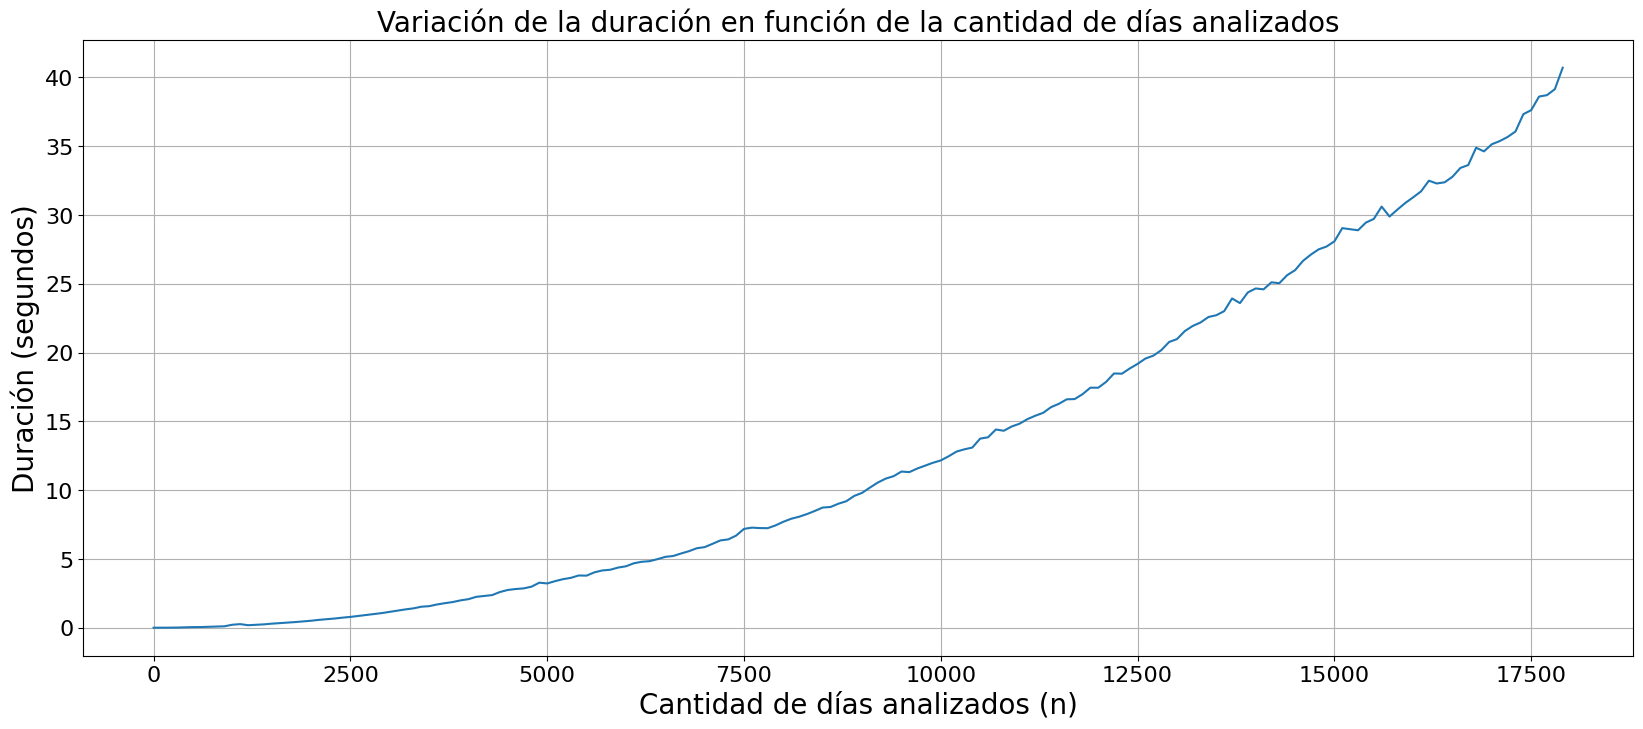

In [16]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20, 8))
plt.plot(tamaños30000, duracion30000)
plt.xlabel('Cantidad de días analizados (n)', fontsize=20)
plt.ylabel('Duración (segundos)', fontsize=20)
plt.title('Variación de la duración en función de la cantidad de días analizados', fontsize=20)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()